In [90]:
import pandas as pd

In [91]:
file_name = r'C:\Users\rajas\Downloads\airfoil_self_noise.dat'

In [92]:
df=pd.read_csv(file_name,sep='\t',header=None)

In [93]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [94]:
'''This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.
'''

'This problem has the following inputs:\n1. Frequency, in Hertzs.\n2. Angle of attack, in degrees.\n3. Chord length, in meters.\n4. Free-stream velocity, in meters per second.\n5. Suction side displacement thickness, in meters.\n\nThe only output is:\n6. Scaled sound pressure level, in decibels.\n'

In [95]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [96]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [97]:
#Check for any NULL values in the data
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [98]:
#step1: Split and create train test split

In [99]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [101]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


In [102]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side', 'pressure level'],
      dtype='object')

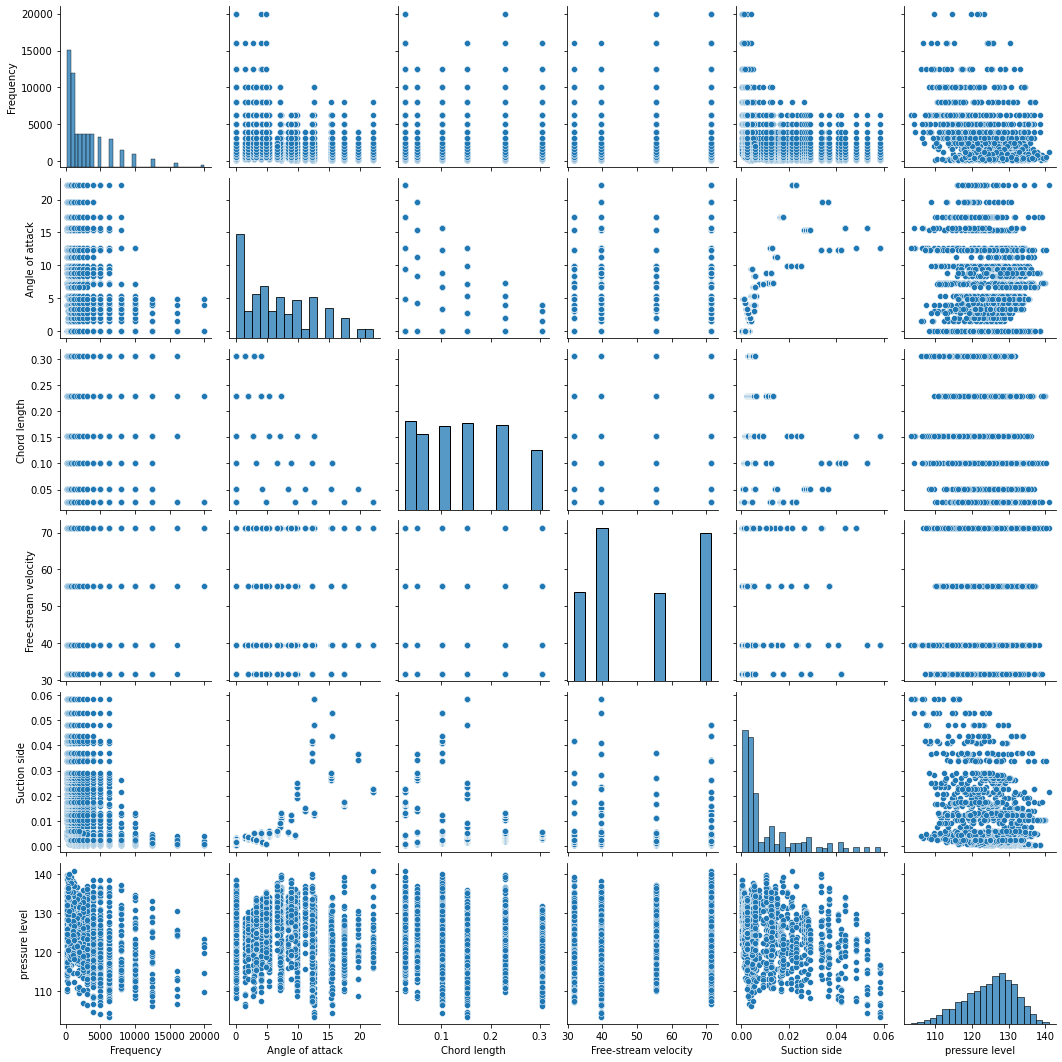

In [103]:
#step2: Perfrom EDA
import seaborn as sns
sns.pairplot(df)

In [104]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\rajas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

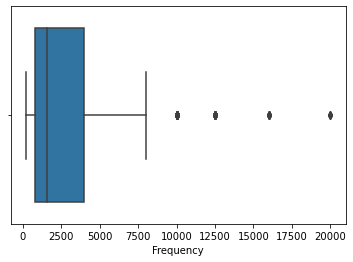

In [105]:
sns.boxplot(X_train["Frequency"])

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfr=RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=None
    )

In [108]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [109]:
y_pred_rfr = rfr.predict(X_test)

In [110]:
y_test

51      125.045
1465    118.767
184     120.233
1000    137.047
746     134.556
         ...   
1295    131.434
578     119.137
352     128.119
727     128.560
1298    134.034
Name: pressure level, Length: 496, dtype: float64

In [111]:
from sklearn.metrics import r2_score

In [112]:
r2_score(y_test,y_pred_rfr)

0.927938994421009

In [113]:
from sklearn.svm import SVR
svr = SVR()

In [114]:
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

In [115]:
r2_score(y_test,y_pred_svr)

0.11649932904323934

In [116]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [117]:
lr = LinearRegression()

In [118]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [119]:
r2_score(y_test,y_pred_lr)

0.5124474986138426

In [120]:
ridge = Ridge()

In [121]:
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.4769144167785677

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
dtr = DecisionTreeRegressor(criterion='squared_error',
    max_depth=None)

In [124]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [125]:
y_pred_dtr = dtr.predict(X_test)

In [126]:
r2_score(y_test,y_pred_dtr)

0.8452298125494222

In [127]:
#Our best model is Randomforest and we will pickle the same

In [128]:
import pickle

In [130]:
pickle.dump(rfr,open("model_rf.pkl","wb"))
#to load the model: pickle.load(open(model_file_name,"rb")) into an object and use the object to do prediction